<a href="https://colab.research.google.com/github/AbhiramBorra/FakeAmazonReviewsDetection/blob/main/YelpReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
We are integrating the Google Drive into the Colab environment system.
'''
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import pylab as pl
from sklearn.model_selection import train_test_split
from pandas import *

In [77]:
'''
In this section, we load and preprocess a CSV file dataset for data analysis
using popular Python libraries including pandas, numpy, matplotlib.pyplot, and seaborn

We use the pd.read_csv() function so that the program subsequently reads the CSV file
into two-dimensional tabular data structure DataFrame objects namely -  df and amazonData_train

We then used the df.columns attribute in order to return a list of the names of the columns.
Finally, use the df.head() approach to produce an additional DataFrame
containing the specified number of rows from the top.

'''
# load csv
df = pd.read_csv
df = pd.read_csv("/content/drive/Shareddrives/ECS 171 Group Project/Labelled Yelp Dataset.csv")
df = df.drop(columns = ['User_id', 'Product_id', 'Date'])  # Drop uneeded columns
df['Label'].replace([-1], [0], inplace=True)
df = df.rename(columns={"Label" : "Real"})  # Rename column
df.head()

,Rating,Review,Real
0,3,The food at snack is a selection of popular Gr...,0
1,3,This little place in Soho is wonderful. I had ...,0
2,4,ordered lunch for 15 from Snack last Friday. Â...,0
3,4,This is a beautiful quaint little restaurant o...,0
4,4,Snack is great place for a Â casual sit down l...,0


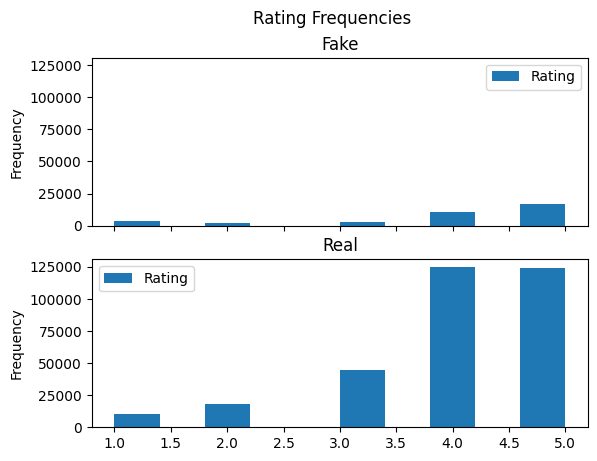

In [78]:
# Histogram
histo_df = df
histo_df.head()
df['Real'].replace([0, 1], ["Fake", "Real"], inplace=True)
hist = df.plot(kind="hist", by="Real", subplots=True, sharex=True, sharey=True, title="Rating Frequencies")

<ipython-input-3-6dfe06e688a8>:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = cmap, annot = True, vmin = -1, vmax = 1, center = 0)


'\n\nUpon execution, the function displays the heatmap on the screen.\n\n'

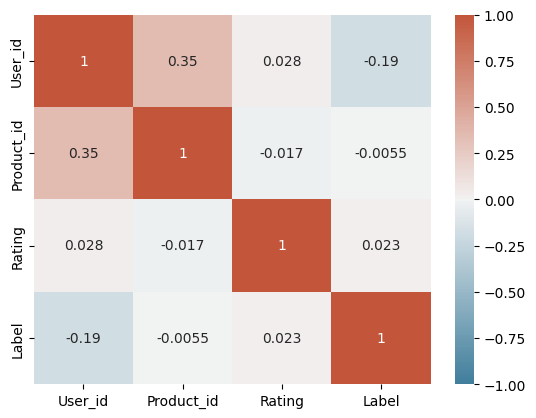

In [ ]:
'''

This reads a CSV file into the pandas DataFrame and plots a heatmap of the correlation matrix
using the sns.heatmap() function
It also creates a color palette using the sns.diverging_palette() function which are used to display data visually

'''

# Matrix

'''

We use the pd.read_csv() function which takes the path of the CSV file
as an argument and returns a DataFrame object

We then assign the DataFrame object to a variable called df
in order to access or modify the data


'''
df = pd.read_csv("/content/drive/Shareddrives/ECS 171 Group Project/Labelled Yelp Dataset.csv")
# df.drop(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
#        'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
#        'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
#        'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.sourceURLs', 'sourceURLs', 'reviews.numHelpful'],axis=1, inplace = True)

# plots a heatmap
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df.corr(), cmap = cmap, annot = True, vmin = -1, vmax = 1, center = 0)

# non much useful informaiton found from the raw data, since they are pure text, need more study, like tf-idf to show the data in numbers.

'''
df.corr():  a method that calculates the correlation matrix of the DataFrame df.
A correlation value where -
-1 means a perfect negative relationship
0 means no relationship,
1 means a perfect positive relationship.

Cmap : color map argument that tells the function what colors to use for the heatmap.
In this case it uses the palette object thaw we created before.

annot : is a  boolean argument that tells the function whether to show the values on the heatmap or not.

vmin meaning the minimum value for the color scale.
Here, vmin = -1 means that any value below -1 will be shown with the same color as -1.

vmax meaning the maximum value for the color scale.
Here, vmax = 1 means that any value above 1 will be shown with the same color as 1.

Center meaning the center value for the color scale.
Here, our center = 0 means that any value equal to 0 will be shown with a neutral color.

'''



'''

Upon execution, the function displays the heatmap on the screen.

'''

'\nOnce executed, the function will displays the pairplot on the screen.\n'

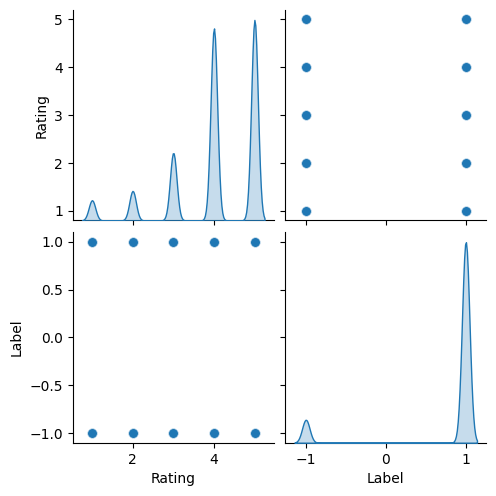

In [ ]:
'''
Reads a CSV file to a pandas DataFrame
'''

# Load data set

df = pd.read_csv('/content/drive/Shareddrives/ECS 171 Group Project/Labelled Yelp Dataset.csv')

# Drop non numerical data to create scatter plots

'''

We assign a DataFrame object to a variable called amazonData_train_numerical.

'''

df = df.drop(columns = ['User_id', 'Product_id', 'Date'])


'''
We create a pairplot to display multiple scatter plots in a grid.

We use the sns.pairplot() method to build a pairplot that depicts the paired relationships
between variables in the DataFrame.

We also take arguments that determine the characteristics of the pairplot,
which includes the data itself, the kind of plot, the format and appearance of the plot, etc.

'''
# Create pairplot to show all scatter plots
sns.pairplot(df, kind="scatter", plot_kws=dict(alpha=0.5, s=50), diag_kind='kde')


'''
Once executed, the function will displays the pairplot on the screen.
'''

In [ ]:
nltk.download()
#step 1: type 'd' , press enter
#step 2: type 'stopwords' , press enter
#step 3: type 'q' , press enter

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

temp = df

# FOR ---------> REVEIWS
#converts upper case letters to lower case letters
temp['Review'] = temp['Review'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
#removes common words such as (i, before, to, between, then, etc.)
stop = stopwords.words('english')
temp['Review']=temp['Review'].apply(lambda x: ' '.join([x for x in x.split() if x not in stop]))
#removes numbers
temp['Review']=temp['Review'].apply(lambda x: re.sub(r'[0-9]+', '', x))
#removes URLs
temp['Review']=temp['Review'].apply(lambda x: BeautifulSoup(x).get_text())
temp['Review']=temp['Review'].apply(lambda x: re.sub(r'http\S+', '', x))
#removes punctuations
temp['Review']=temp['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))




<ipython-input-6-6c42cb7cb029>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  temp['Review']=temp['Review'].apply(lambda x: BeautifulSoup(x).get_text())


# **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
reviews_text = vectorizer.fit_transform(temp['Review'])

In [ ]:
reviews_text

<359052x243697 sparse matrix of type '<class 'numpy.float64'>'
	with 18936018 stored elements in Compressed Sparse Row format>

In [ ]:
reviews_text_array = reviews_text.toarray()

In [ ]:
df.columns

In [ ]:
len(df['Label'])

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(reviews_text_array,df['Label'], train_size=0.9, random_state=21)  # Split Data

# **NeuralNets**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units = 5000, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='SGD',loss='binary_crossentropy')

In [ ]:
#history = model.fit(train_X, train_y, epochs=50, batch_size=1)